# 6.概率

In [1]:
import torch

## 1.基本概率论
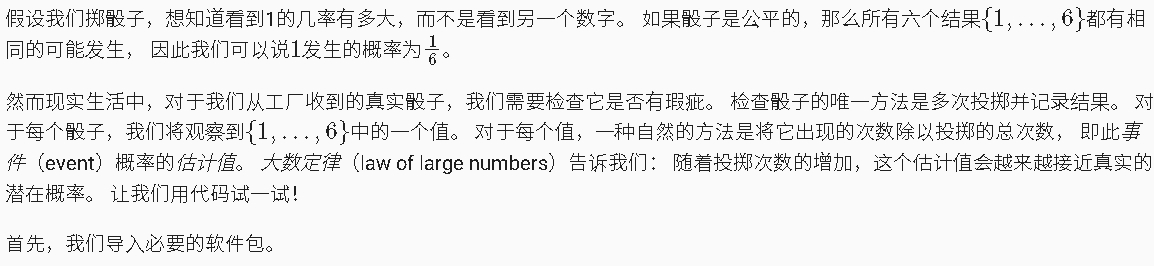

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引处的值是采样结果中出现的次数。

In [10]:
# 概率向量
#每次运行结果不一样
fair_probs=torch.ones([6])/6
print(multinomial.Multinomial(1,fair_probs).sample())

tensor([1., 0., 0., 0., 0., 0.])


在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [11]:
#运行1000000
counts=multinomial.Multinomial(100000,fair_probs).sample()
print(counts)
print(counts/1000000)

tensor([16679., 16788., 16565., 16800., 16420., 16748.])
tensor([0.0167, 0.0168, 0.0166, 0.0168, 0.0164, 0.0167])


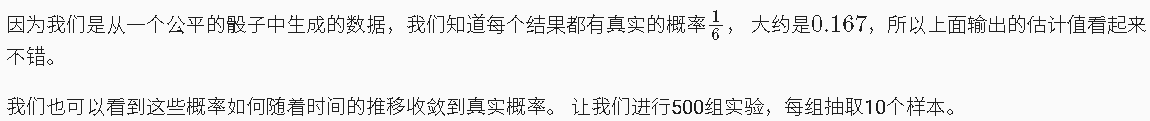

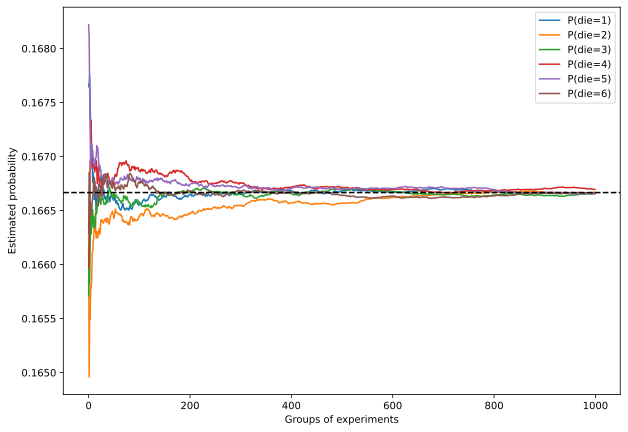

In [30]:
counts = multinomial.Multinomial(100000, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((10,7))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.16666666666, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这
6条实体曲线向真实概率收敛。

### 1.1 概率论公理
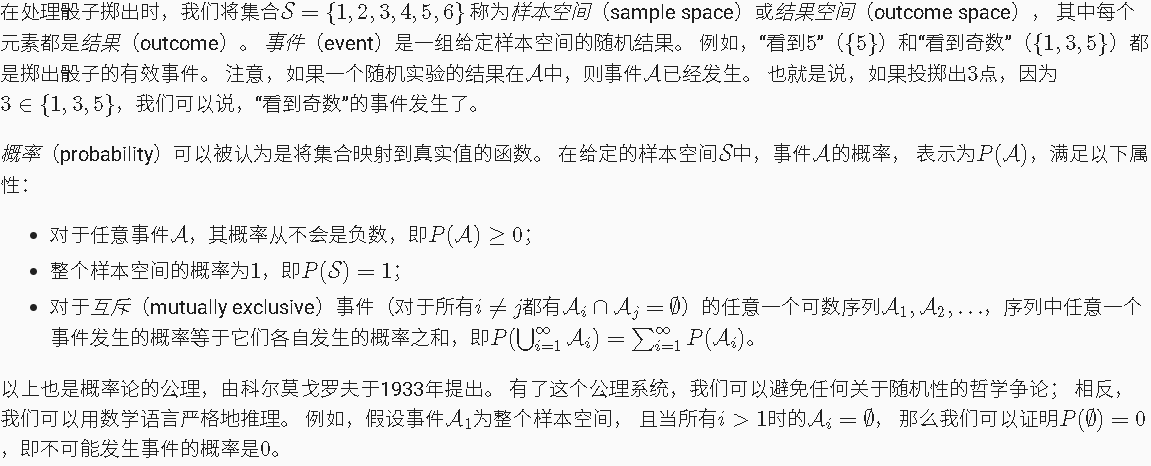

### 1.2 随机变量
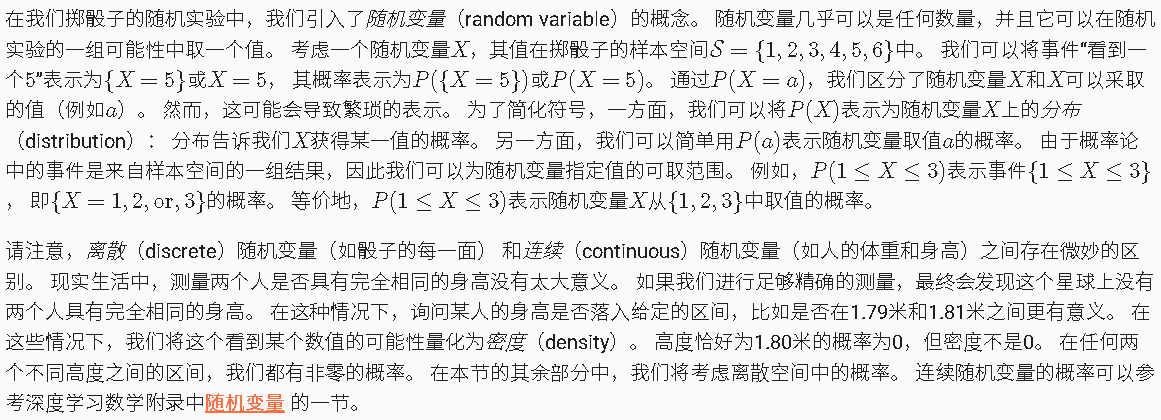

## 2.处理多个随机变量
很多时候，我们会考虑多个随机变量。 比如，我们可能需要对疾病和症状之间的关系进行建模。 给定一个疾病和一个症状，比如“流感”和“咳嗽”，以某个概率存在或不存在于某个患者身上。 我们需要估计这些概率以及概率之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

再举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。 在许多情况下，图像会附带一个标签（label），标识图像中的对象。 我们也可以将标签视为一个随机变量。 我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。 所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

### 2.1联合概率
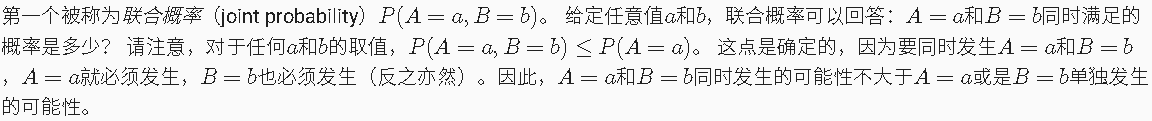

### 2.2条件概率
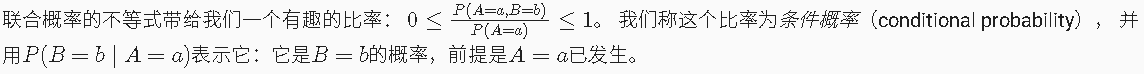

### 2.3贝叶斯定理
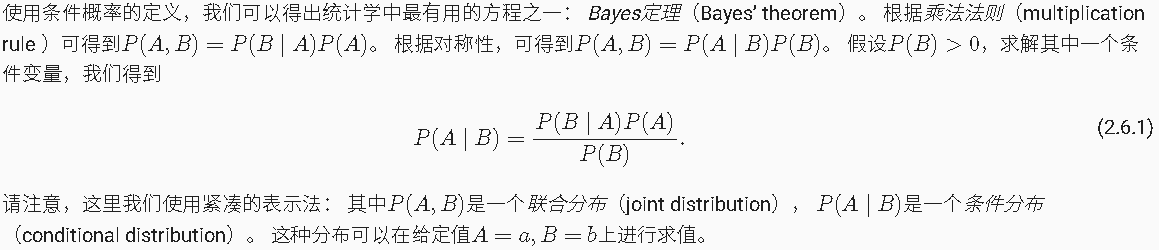

### 2.4边际化
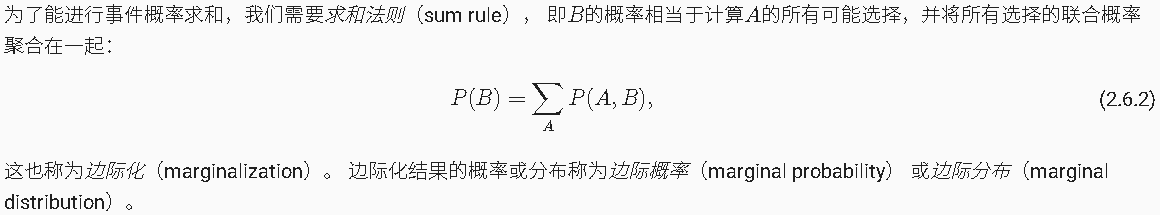

### 2.5 独立性
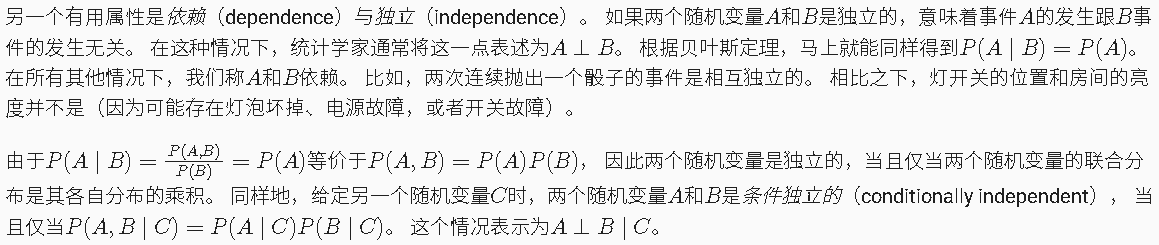

### 2.6应用
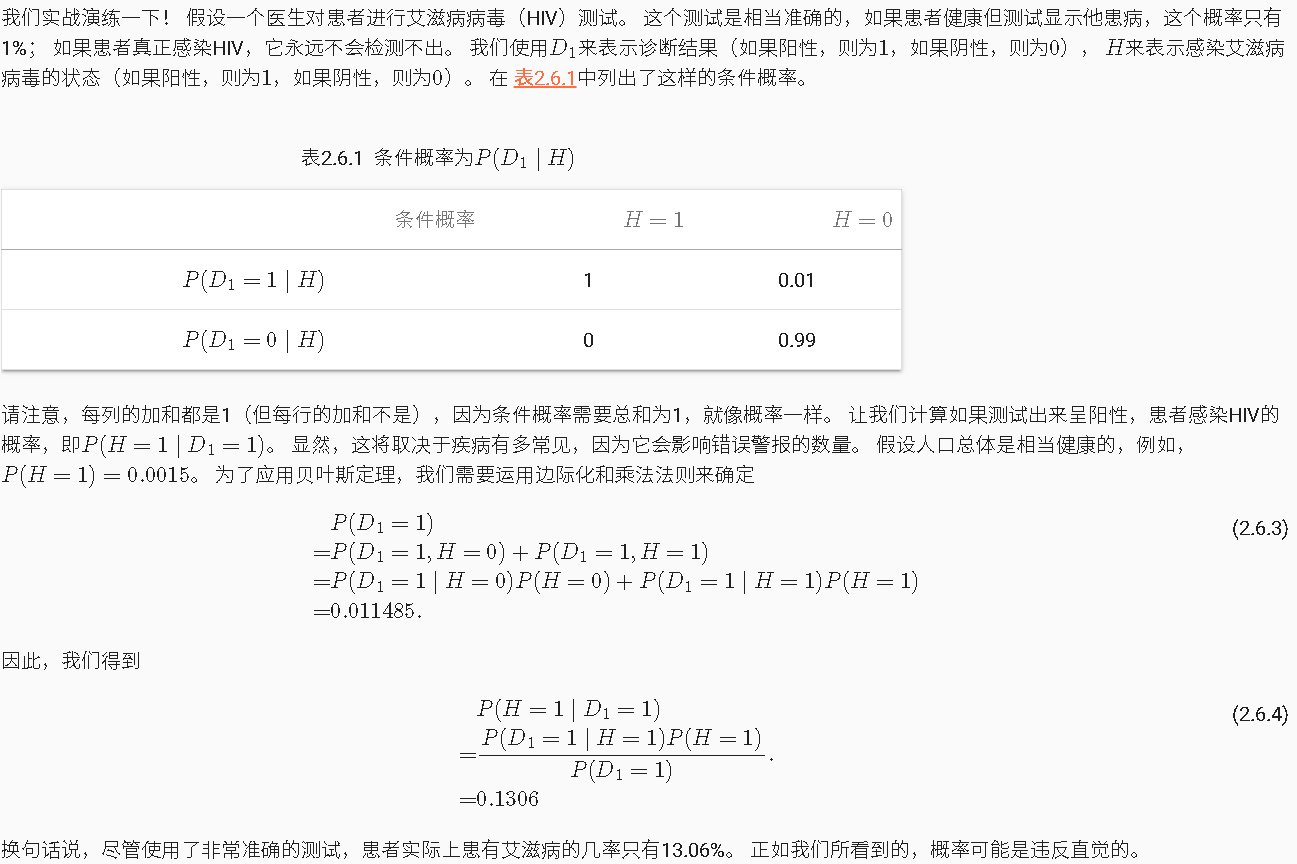
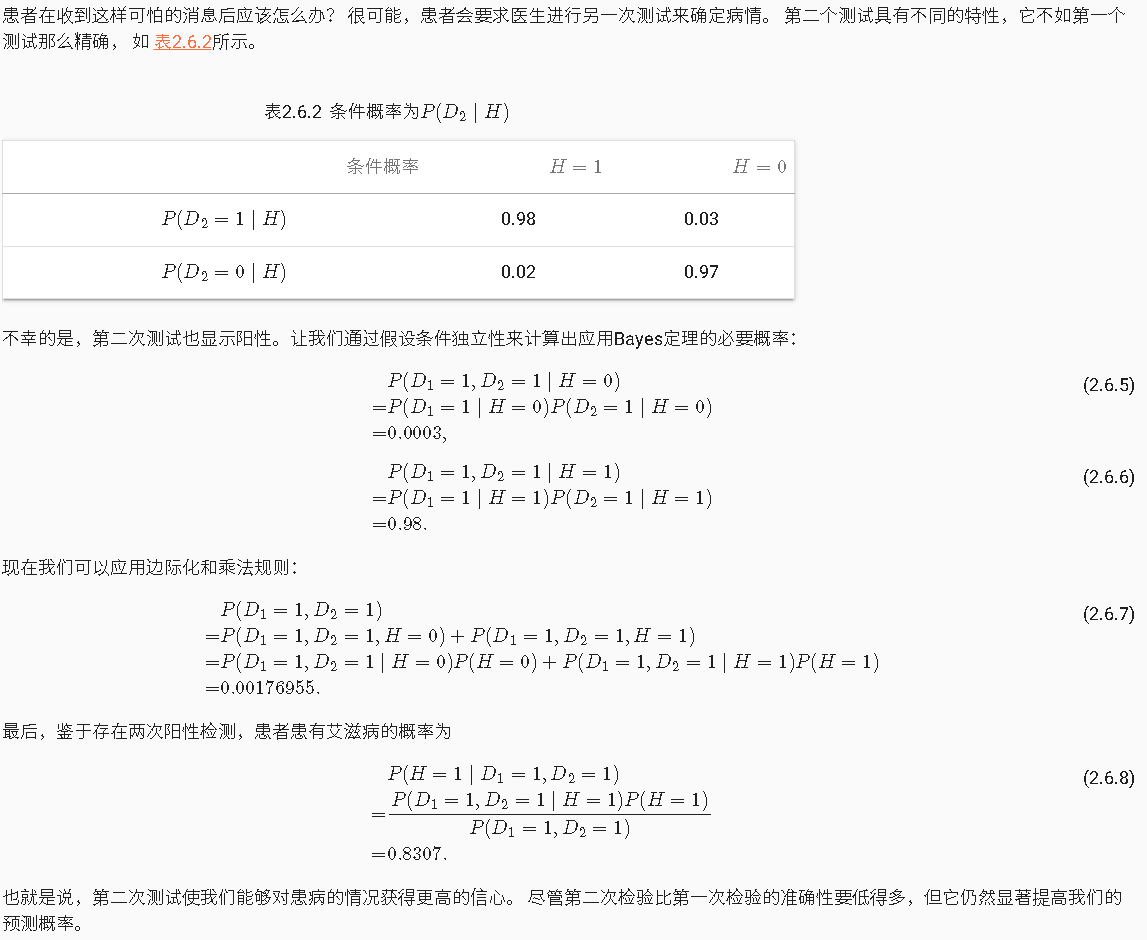

## 3.期望和方差
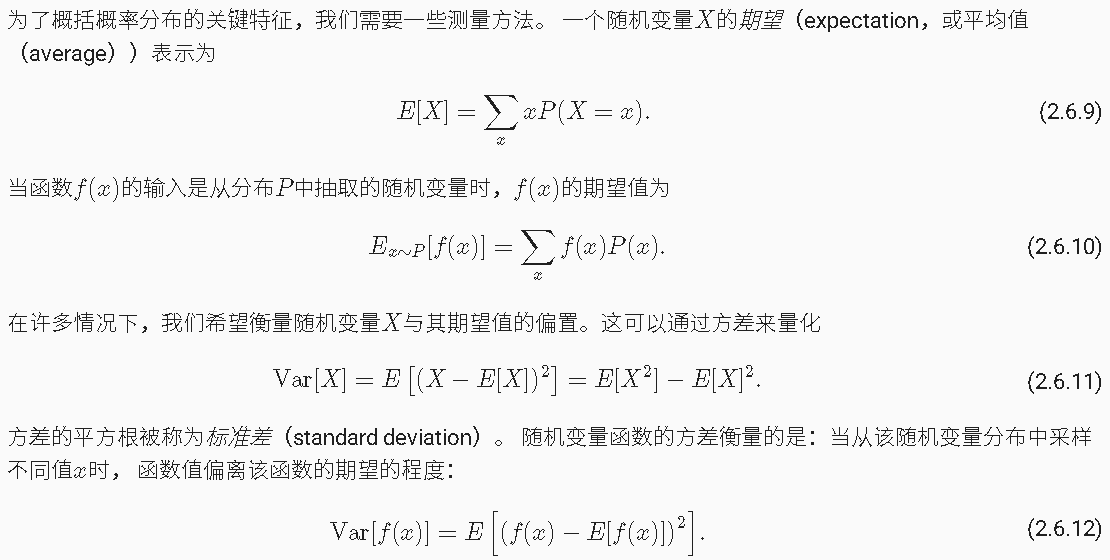

## 5.练习
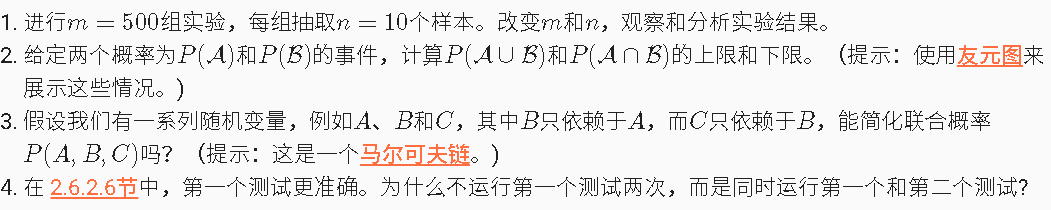

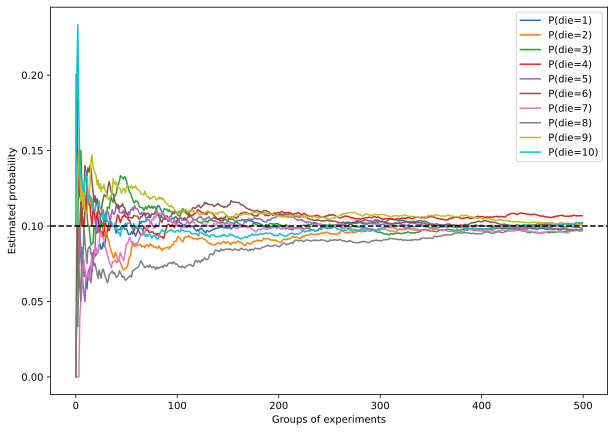

In [34]:
#1
fair_probs=torch.ones([10])/10
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((10,7))
for i in range(10):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.1, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#2
让我一步步分析这个概率问题。

1) 首先，我们知道两个基本条件：
- 给定 P(A)
- 给定 P(B)
- 0 ≤ P(A) ≤ 1
- 0 ≤ P(B) ≤ 1

2) 关于 P(AUB)，我们知道：
P(AUB) = P(A) + P(B) - P(A∩B)

3) 对于 P(A∩B) 的限制：
- P(A∩B) ≥ 0 (概率必须非负)
- P(A∩B) ≤ min(P(A), P(B)) (交集概率不能超过任一事件的概率)

4) 让我们分别计算上下限：

P(AUB) 的上限：
- 当 P(A∩B) 取最小值 0 时
- P(AUB) = P(A) + P(B) - 0 = P(A) + P(B)
- 但是注意，概率不能超过1
- 所以 P(AUB) ≤ min(1, P(A) + P(B))

P(AUB) 的下限：
- 当 P(A∩B) 取最大值 min(P(A), P(B)) 时
- P(AUB) = P(A) + P(B) - min(P(A), P(B))
- 所以 P(AUB) ≥ max(P(A), P(B))

P(A∩B) 的上限：
- 直接为 min(P(A), P(B))

P(A∩B) 的下限：
- max(0, P(A) + P(B) - 1)
- 这是因为 P(AUB) ≤ 1，代入公式 P(AUB) = P(A) + P(B) - P(A∩B)

总结：
1. P(AUB) 的范围：
   - 下限：max(P(A), P(B))
   - 上限：min(1, P(A) + P(B))

2. P(A∩B) 的范围：
   - 下限：max(0, P(A) + P(B) - 1)
   - 上限：min(P(A), P(B))


### 3
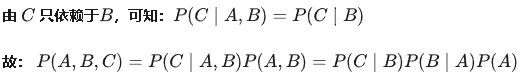

4.虽然第一个测试更准确，但进行两次结果相同。而第二个测试具有不同的特征，可以排除单一测试的系统性误差，增加测试结果的多样性，从而提供结果的可靠性和鲁棒性，使得最终结果更为可靠。

## 相关概念梳理
1. 条件概率和联合概率的相互转换:P(A|B)=P(A,B)/P(B)
2. 贝叶斯定理
    本质是"通过结果推原因"的方法。

    公式: P(A|B) = P(B|A) × P(A) / P(B)
    生活例子:

    医生诊断疾病就是用贝叶斯思维
    假设某症状在感冒患者中出现概率是80%
    但这个症状在其他病中也可能出现
    所以看到症状后,还要考虑:

    这个季节感冒的基础发病率
    其他可能导致该症状的疾病概率
    结合这些算出真正是感冒的概率
 